https://drive.google.com/file/d/1Ck8R2GXK_ZeW9oYRIdXgVhBqi3ibt_QJ/view?usp=sharing

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn import compose

In [2]:
df_car = pd.read_csv("./car_evaluation.csv", header=None)

Data Exploration

In [3]:
df_car.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
print(df_car.shape)

(1728, 7)


In [5]:
col_names = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
df_car.columns = col_names

In [6]:
df_car.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [7]:
df_car.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [8]:
#Class will be the target variable
df_car["class"].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [9]:
df_car.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

Data processing

In [10]:
X = df_car.drop(columns=["class"])
y = df_car["class"]

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [12]:
print(X_train.shape)
print(X_test.shape)

(1209, 6)
(519, 6)


In [13]:
print(y_train.shape)
print(y_test.shape)

(1209,)
(519,)


In [14]:
X_train.head(5)

,buying,maint,doors,persons,lug_boot,safety
1178,med,med,5more,4,big,high
585,high,high,3,more,small,low
1552,low,med,3,4,med,med
1169,med,med,5more,2,big,high
1033,med,high,4,2,big,med


In [15]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [16]:
columns = ["buying","maint","doors","persons","lug_boot","safety"]
values_for_each_variable = [X[col].value_counts().index.to_list() for col in columns]
values_for_each_variable

[['vhigh', 'high', 'med', 'low'],
 ['vhigh', 'high', 'med', 'low'],
 ['2', '3', '4', '5more'],
 ['2', '4', 'more'],
 ['small', 'med', 'big'],
 ['low', 'med', 'high']]

In [17]:
ordinal_encoder = OrdinalEncoder(categories= values_for_each_variable)

In [18]:
categorical_transformer = compose.make_column_transformer(
    (ordinal_encoder, columns),
    remainder="passthrough"
)

In [26]:
def remove_prefix(column_name):
    prefixes = ["ordinalencoder__", "onehotencoder__", "remainder__"]
    for prefix in prefixes:
        if column_name.startswith(prefix):
            return column_name.removeprefix(prefix)
    return column_name

X_train = (
    pd.DataFrame(
        data = categorical_transformer.fit_transform(X_train),
        columns = categorical_transformer.get_feature_names_out(),
        index= X_train.index
    )
    .rename(
        columns = remove_prefix
    )
)

X_test = (
    pd.DataFrame(
        data = categorical_transformer.fit_transform(X_test),
        columns = categorical_transformer.get_feature_names_out(),
        index= X_test.index
    )
    .rename(
        columns = remove_prefix
    )
)

In [27]:
X_train

,buying,maint,doors,persons,lug_boot,safety
1178,2.0,2.0,3.0,1.0,2.0,2.0
585,1.0,1.0,1.0,2.0,0.0,0.0
1552,3.0,2.0,1.0,1.0,1.0,1.0
1169,2.0,2.0,3.0,0.0,2.0,2.0
1033,2.0,1.0,2.0,0.0,2.0,1.0
...,...,...,...,...,...,...
1130,2.0,2.0,1.0,2.0,1.0,2.0
1294,2.0,3.0,3.0,2.0,2.0,1.0
860,1.0,3.0,3.0,2.0,1.0,2.0
1459,3.0,1.0,2.0,0.0,0.0,1.0


In [28]:
X_test

,buying,maint,doors,persons,lug_boot,safety
599,1.0,1.0,2.0,0.0,1.0,2.0
1201,2.0,3.0,0.0,1.0,1.0,1.0
628,1.0,1.0,3.0,0.0,2.0,1.0
1498,3.0,1.0,3.0,1.0,1.0,1.0
1263,2.0,3.0,2.0,2.0,1.0,0.0
...,...,...,...,...,...,...
490,1.0,0.0,2.0,0.0,1.0,1.0
1277,2.0,3.0,3.0,0.0,2.0,2.0
287,0.0,2.0,2.0,1.0,2.0,2.0
1639,3.0,3.0,0.0,2.0,0.0,1.0


In [29]:
tree = DecisionTreeClassifier(max_depth=2, random_state=0)

In [30]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [31]:
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [38]:
y_test_pred[:5]

array(['unacc', 'acc', 'unacc', 'acc', 'unacc'], dtype=object)

In [33]:
train_accuracy_tree = accuracy_score(y_train, y_train_pred)
test_accuracy_tree = accuracy_score(y_test, y_test_pred)

print(f"Train accuracy score {train_accuracy_tree}")
print(f"Test accuracy score {test_accuracy_tree}")

Train accuracy score 0.771712158808933
Test accuracy score 0.791907514450867


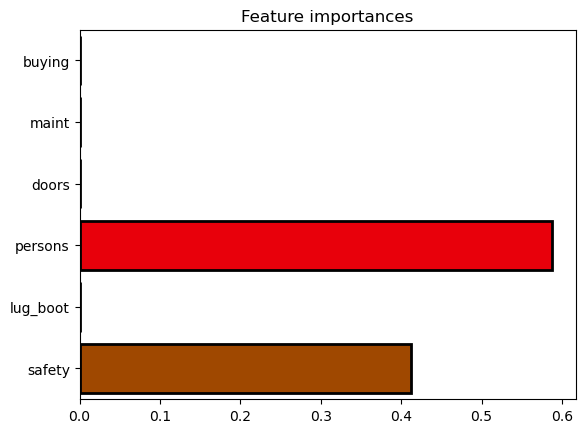

In [34]:
importances = tree.feature_importances_
sns.barplot(x=importances, y=X.columns, palette="bright", saturation=2.0, edgecolor="black", linewidth=2)
plt.title("Feature importances")
plt.show()

It's important to create a decision tree with only the main variables, and compare results

# Random forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rf = RandomForestClassifier(n_estimators = 10, random_state = 0)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [40]:
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

In [41]:
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

print(f"Train accuracy: {train_accuracy_rf}")
print(f"Test accuracy: {test_accuracy_rf}")

Train accuracy: 1.0
Test accuracy: 0.9479768786127167


In [44]:
features_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
features_importances

safety      0.307429
persons     0.228673
buying      0.202163
maint       0.118010
lug_boot    0.083882
doors       0.059844
dtype: float64

Text(0.5, 1.0, 'Visualizando los Features Importances')

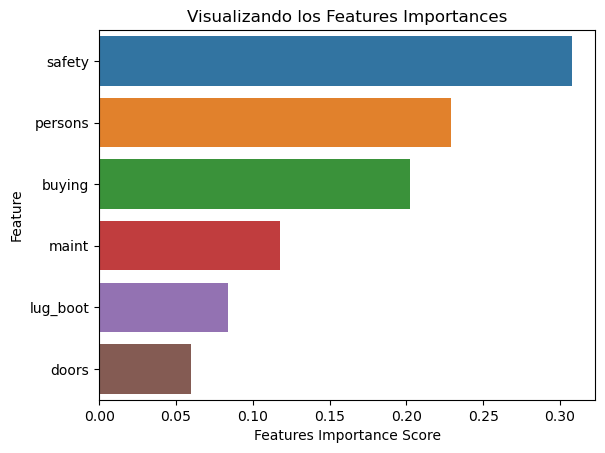

In [45]:
sns.barplot(x=features_importances, y=features_importances.index)
plt.xlabel("Features Importance Score")
plt.ylabel("Feature")
plt.title("Visualizando los Features Importances")

In [46]:
cm = confusion_matrix(y_test, y_test_pred_rf)
cm

array([[106,   5,   5,   2],
       [  4,  13,   0,   2],
       [  6,   0, 352,   0],
       [  3,   0,   0,  21]])

In [47]:
print(classification_report(y_test,y_test_pred_rf))

              precision    recall  f1-score   support

         acc       0.89      0.90      0.89       118
        good       0.72      0.68      0.70        19
       unacc       0.99      0.98      0.98       358
       vgood       0.84      0.88      0.86        24

    accuracy                           0.95       519
   macro avg       0.86      0.86      0.86       519
weighted avg       0.95      0.95      0.95       519

